In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Datasets/merged(flats_&_houses)_CLEANED2.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,orchid petals,sector 49,4.52,10984.0,4115.0,Super Built up area 4115(382.3 sq.m.),5,5,3+,14.0,West,Moderately Old,4115.0,NaN,NaN,1,1,0,1,0,2,49
1,flat,sobha city,sector 108,2.60,15195.0,1711.0,Super Built up area 1711(158.96 sq.m.),3,3,2,8.0,East,Relatively New,1711.0,NaN,NaN,0,0,0,0,0,2,99
2,flat,paras dews,sector 106,1.00,7220.0,1385.0,Super Built up area 1385(128.67 sq.m.)Built Up...,2,2,3+,2.0,North-East,New Property,1385.0,940.0,845.0,0,0,0,0,0,1,21
3,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,2,15
4,flat,signature global park,sohna road,0.70,6071.0,1153.0,Carpet area: 1153 (107.12 sq.m.),3,3,3,2.0,North,Relatively New,NaN,NaN,1153.0,0,0,0,1,0,2,152


In [5]:
df.shape

(3677, 23)

In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

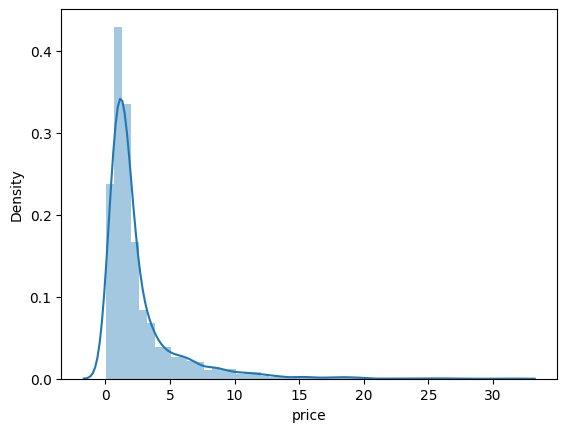

In [7]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

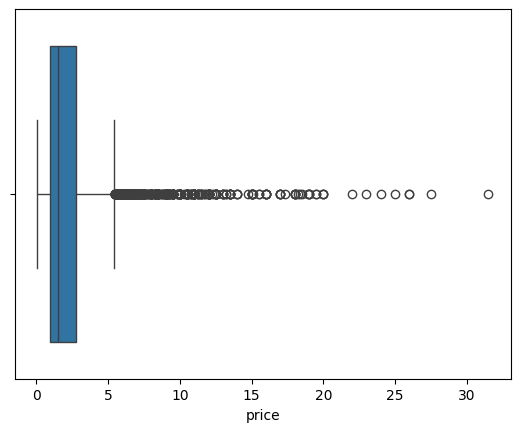

In [8]:
sns.boxplot(x=df['price'])

In [9]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [10]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2699,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,0,74
3266,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
3453,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
2694,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,0,72
3577,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,2,0
468,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
1355,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
997,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,2,54
3104,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,0,97
972,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153


### Price_per_sqft

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

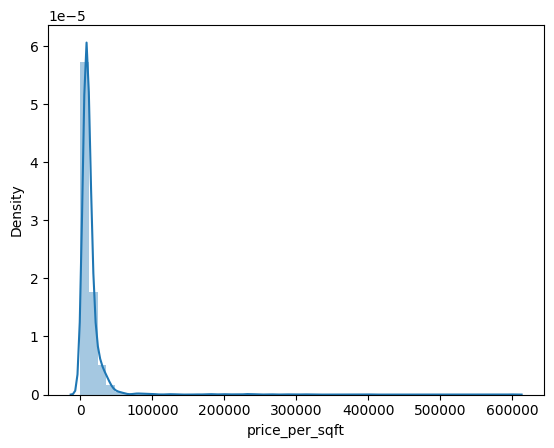

In [12]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

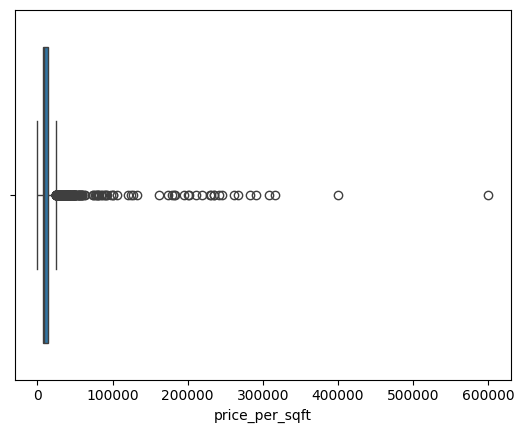

In [13]:
sns.boxplot(x=df['price_per_sqft'])

In [14]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [15]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [16]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [17]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [18]:
df.update(outliers_sqft)

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

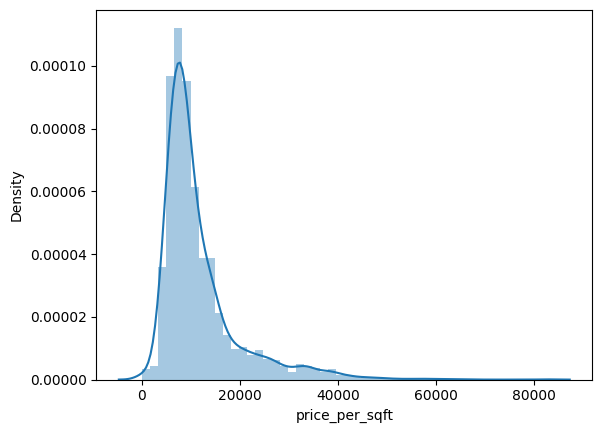

In [19]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

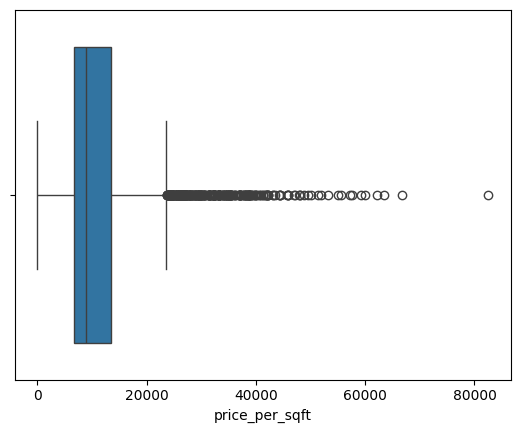

In [20]:
sns.boxplot(x=df['price_per_sqft'])

In [21]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
146,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,1,103
468,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
783,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,2,0
1574,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,0,72
1974,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,1,153
2064,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,2,0
2397,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,0,75
2694,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,0,72
2864,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,1,99
3368,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,0,137


In [22]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

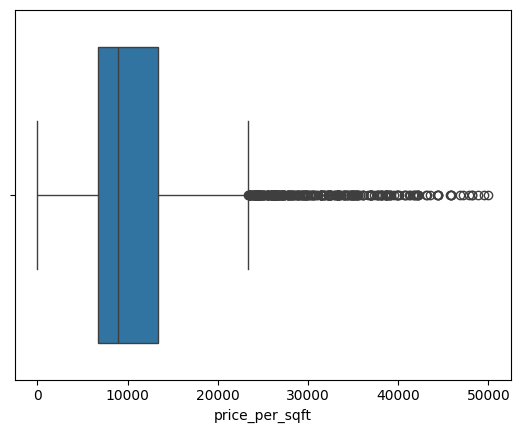

In [23]:
sns.boxplot(x=df['price_per_sqft'])

### Area

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

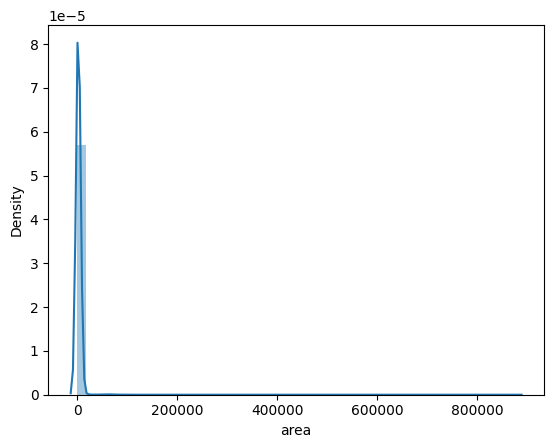

In [24]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

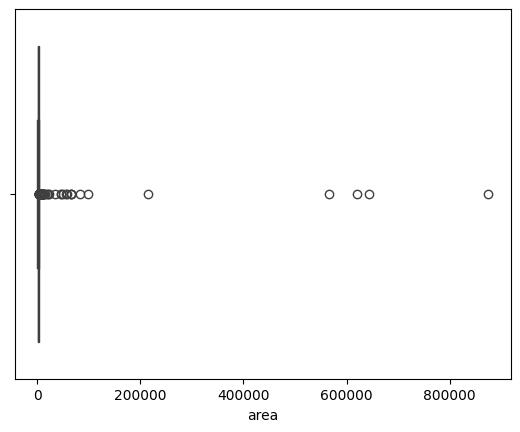

In [25]:
sns.boxplot(x=df['area'])

In [26]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [27]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1663,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,2,76
2440,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,0,44
2861,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0
2866,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,2,65
3221,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,2,44


In [28]:
df = df[df['area'] < 100000]

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

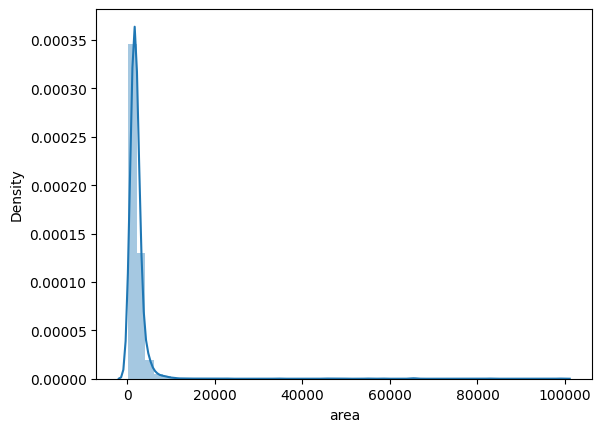

In [29]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

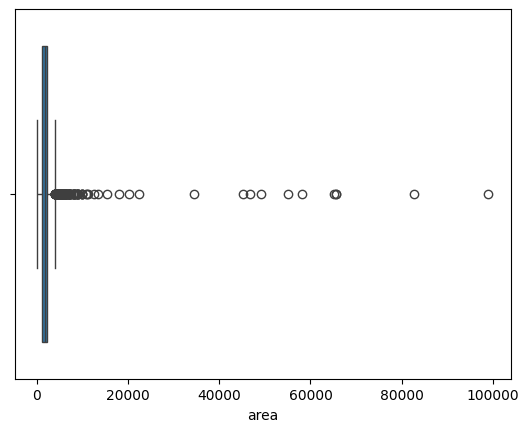

In [30]:
sns.boxplot(x=df['area'])

In [31]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1641,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
3733,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,2,7
3,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,2,15
1762,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,2,51
517,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,2,0
3182,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,2,15
1255,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,2,37
1294,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,2,37
1295,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
202,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,2,33


In [32]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [33]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1641,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
3733,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,2,7
3,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,2,15
1762,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,2,51
517,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,2,0
3182,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,2,15
1255,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,2,37
1294,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,2,37
1295,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
202,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,2,33


In [34]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

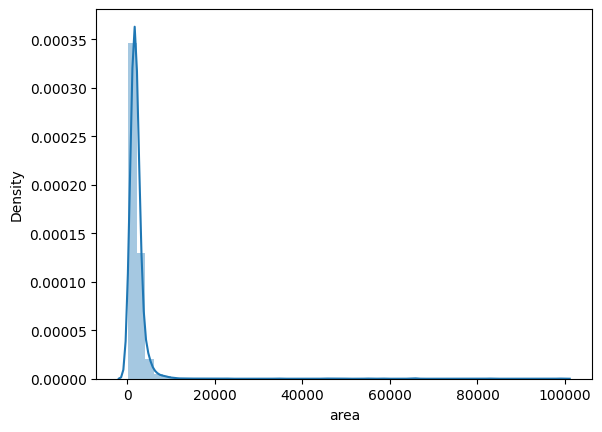

In [35]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

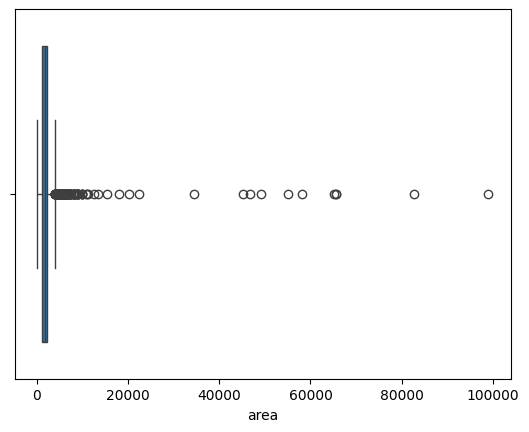

In [36]:
sns.boxplot(x=df['area'])

In [37]:
df['area'].describe()

count     3633.000000
mean      2153.217726
std       3629.541133
min        145.000000
25%       1261.000000
50%       1750.000000
75%       2344.000000
max      98978.000000
Name: area, dtype: float64

### Bedroom

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

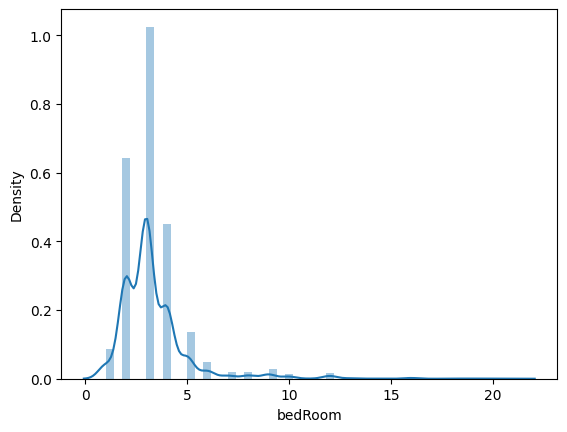

In [38]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

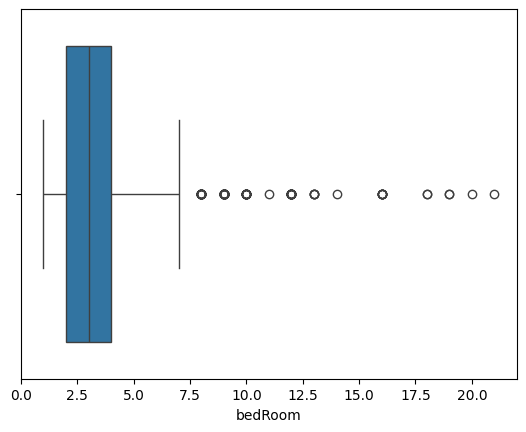

In [39]:
sns.boxplot(x=df['bedRoom'])

In [40]:
df['bedRoom'].describe()

count    3633.000000
mean        3.332783
std         1.831463
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [41]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1282,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,0,49
1925,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,0,22
2705,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,2,74
2551,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,2,68
1329,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,0,57
1837,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,0,70
972,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153
204,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,1,0,1,49
597,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,1,0
3491,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31


In [42]:
df = df[df['bedRoom'] <= 10]

In [43]:
df.shape

(3588, 23)

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

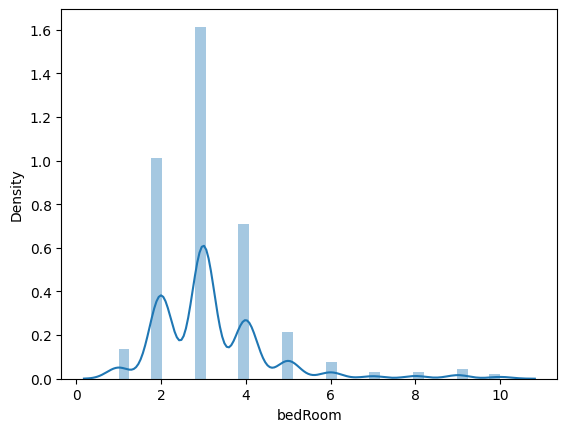

In [44]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

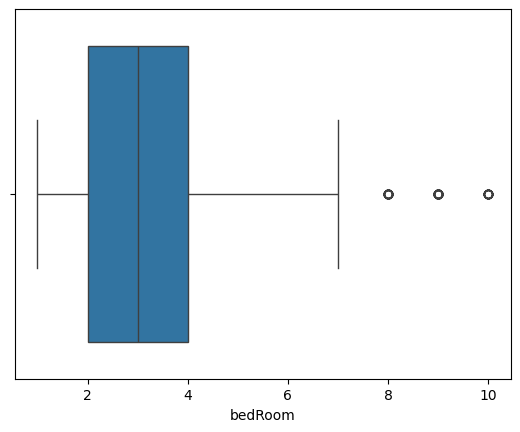

In [45]:
sns.boxplot(x=df['bedRoom'])

In [46]:
df['bedRoom'].describe()

count    3588.000000
mean        3.202899
std         1.395789
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

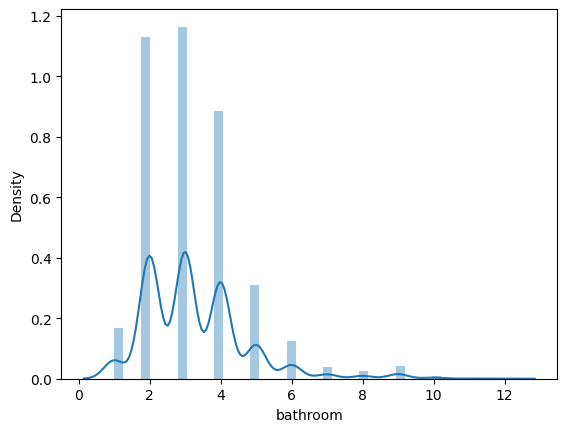

In [47]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

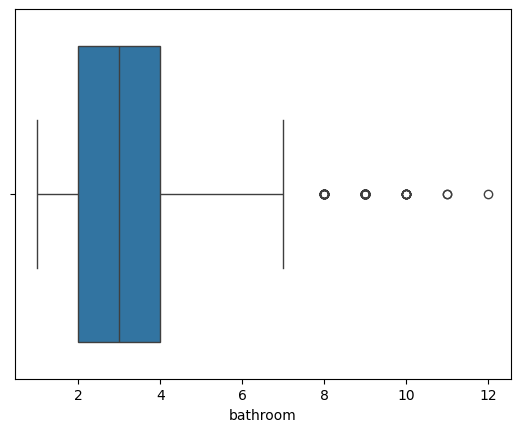

In [48]:
sns.boxplot(x=df['bathroom'])

In [49]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3720,house,adani brahma samsara,sector 110,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146
820,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,0,38
3423,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39


In [50]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,orchid petals,sector 49,4.52,10984.0,4115.0,Super Built up area 4115(382.3 sq.m.),5,5,3+,14.0,West,Moderately Old,4115.0,NaN,NaN,1,1,0,1,0,2,49
1,flat,sobha city,sector 108,2.60,15195.0,1711.0,Super Built up area 1711(158.96 sq.m.),3,3,2,8.0,East,Relatively New,1711.0,NaN,NaN,0,0,0,0,0,2,99
3,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,2,15
4,flat,signature global park,sohna road,0.70,6071.0,1153.0,Carpet area: 1153 (107.12 sq.m.),3,3,3,2.0,North,Relatively New,NaN,NaN,1153.0,0,0,0,1,0,2,152
5,house,independent,sector 24,5.25,38889.0,1350.0,Plot area 163(136.29 sq.m.)Built Up area: 160 ...,4,4,3+,2.0,East,Relatively New,NaN,160.0,150.0,0,1,0,1,0,1,72


### super built up area

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

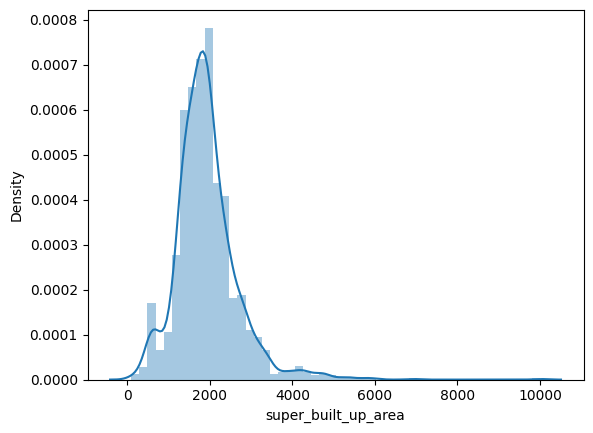

In [51]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

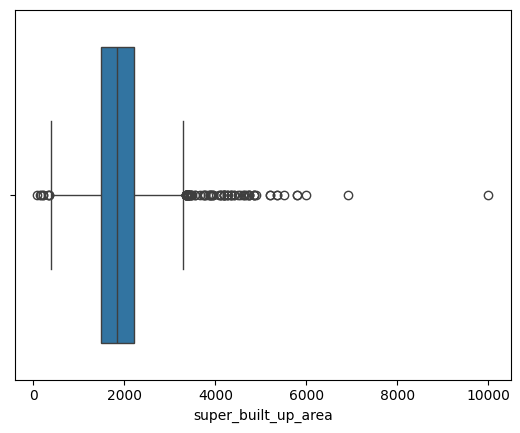

In [52]:
sns.boxplot(x=df['super_built_up_area'])

In [53]:
df['super_built_up_area'].describe()

count     1869.000000
mean      1924.856972
std        763.978604
min         89.000000
25%       1479.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [54]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
878,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,2,49
2638,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140


### built up area

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

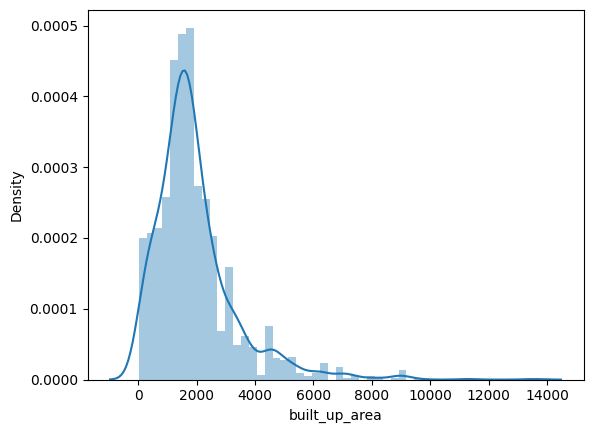

In [55]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

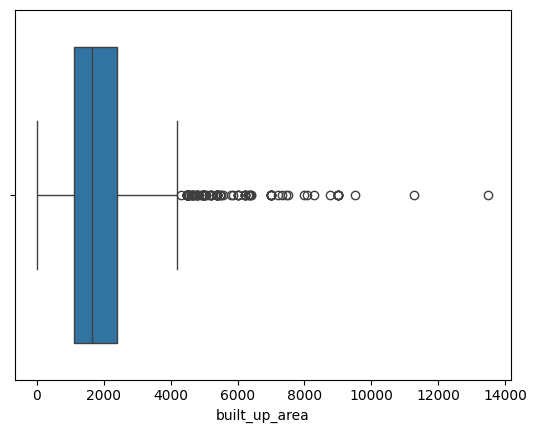

In [56]:
sns.boxplot(x=df['built_up_area'])

In [57]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3266,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
3359,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3,3,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,2,0


### carpet area

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

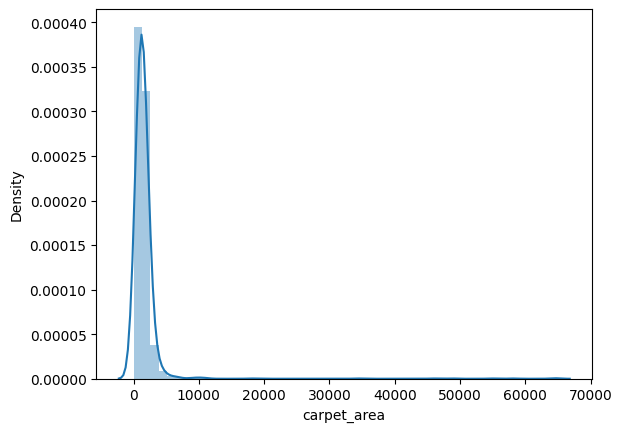

In [58]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

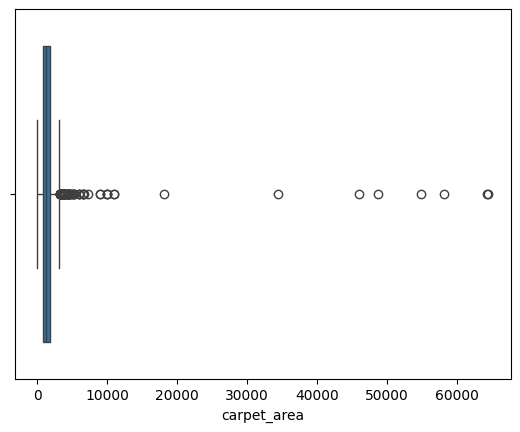

In [59]:
sns.boxplot(x=df['carpet_area'])

In [61]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,2,15
202,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,2,33
438,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,2,60
1255,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,2,37
1294,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,2,37
1641,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,1,60
1762,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,2,51
1867,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
2702,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,2,68
3182,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,2,15


In [62]:
df.loc[2131,'carpet_area'] = 1812

In [63]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,2,15
202,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,2,33
438,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,2,60
1255,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,2,37
1294,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,2,37
1641,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,1,60
1762,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,2,51
1867,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
2702,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,2,68
3182,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,2,15


In [64]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,orchid petals,sector 49,4.52,10984.0,4115.0,Super Built up area 4115(382.3 sq.m.),5,5,3+,14.0,West,Moderately Old,4115.0,NaN,NaN,1,1,0,1,0,2,49
1,flat,sobha city,sector 108,2.60,15195.0,1711.0,Super Built up area 1711(158.96 sq.m.),3,3,2,8.0,East,Relatively New,1711.0,NaN,NaN,0,0,0,0,0,2,99
3,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,2,15
4,flat,signature global park,sohna road,0.70,6071.0,1153.0,Carpet area: 1153 (107.12 sq.m.),3,3,3,2.0,North,Relatively New,NaN,NaN,1153.0,0,0,0,1,0,2,152
5,house,independent,sector 24,5.25,38889.0,1350.0,Plot area 163(136.29 sq.m.)Built Up area: 160 ...,4,4,3+,2.0,East,Relatively New,NaN,160.0,150.0,0,1,0,1,0,1,72


C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

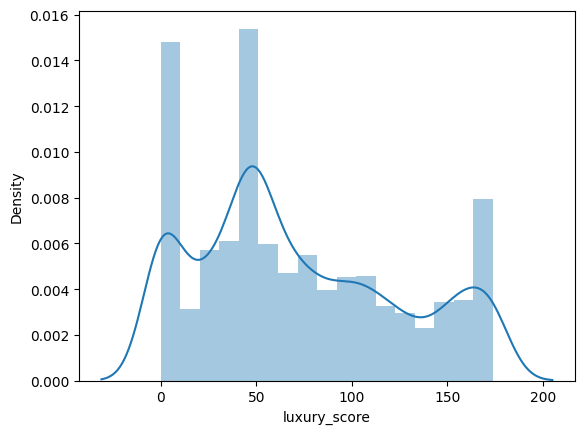

In [65]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

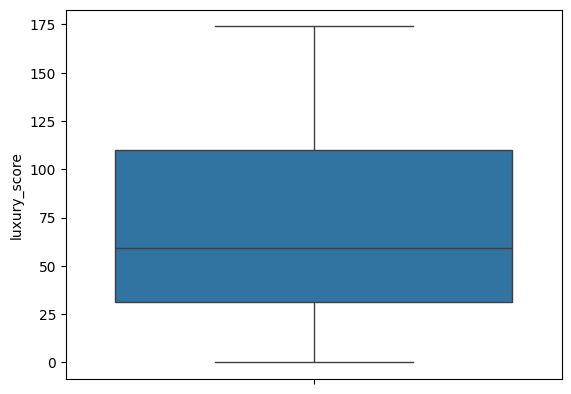

In [66]:
sns.boxplot(df['luxury_score'])

In [67]:
df.shape

(3588, 23)

In [68]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [69]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,orchid petals,sector 49,4.52,10984.0,4115.0,Super Built up area 4115(382.3 sq.m.),5,5,3+,14.0,West,Moderately Old,4115.0,NaN,NaN,1,1,0,1,0,2,49
1,flat,sobha city,sector 108,2.60,15196.0,1711.0,Super Built up area 1711(158.96 sq.m.),3,3,2,8.0,East,Relatively New,1711.0,NaN,NaN,0,0,0,0,0,2,99
3,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,2,15
4,flat,signature global park,sohna road,0.70,6071.0,1153.0,Carpet area: 1153 (107.12 sq.m.),3,3,3,2.0,North,Relatively New,NaN,NaN,1153.0,0,0,0,1,0,2,152
5,house,independent,sector 24,5.25,38889.0,1350.0,Plot area 163(136.29 sq.m.)Built Up area: 160 ...,4,4,3+,2.0,East,Relatively New,NaN,160.0,150.0,0,1,0,1,0,1,72


C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

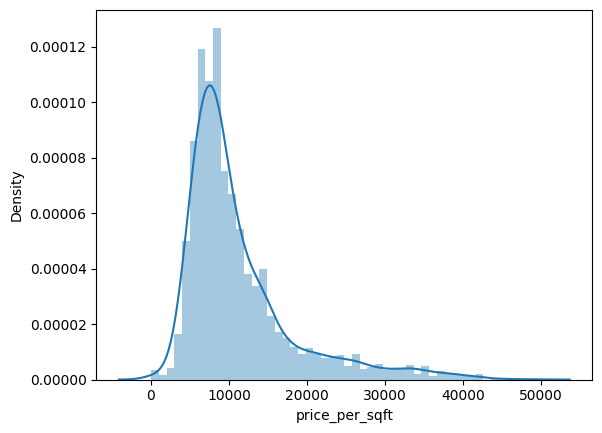

In [70]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

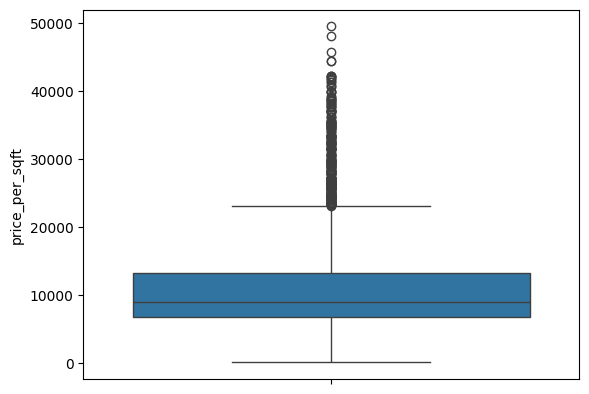

In [71]:
sns.boxplot(df['price_per_sqft'])

In [72]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
941,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
1843,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
2068,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,1,88
2336,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,1,7
3104,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,0,97
3222,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,1,60
3290,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,0,0
3535,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,2,0
3800,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103


In [83]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

185.9466666666667

In [84]:
df[(df['area']/df['bedRoom'])<183].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1164,house,shri shyam residency,sector 104,0.62,12400.0,500.0,Plot area 500(46.45 sq.m.)Built Up area: 900 s...,3,3,1,2.0,NaN,Moderately Old,NaN,900.0,480.0,0,0,0,0,1,0,8
2826,house,sector 57 huda,sector 57,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,4.0,East,Relatively New,NaN,162.0,160.0,0,0,1,1,0,1,94
2524,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,2,0
2590,house,jacobpura,sector 12,0.53,14601.0,363.0,Plot area 360(33.45 sq.m.),4,4,2,3.0,East,Relatively New,NaN,360.0,NaN,0,0,0,0,0,2,0
432,house,independent,sector 11,0.90,10000.0,900.0,Plot area 900(83.61 sq.m.),7,4,3+,4.0,NaN,Moderately Old,NaN,900.0,NaN,0,0,0,0,0,2,7


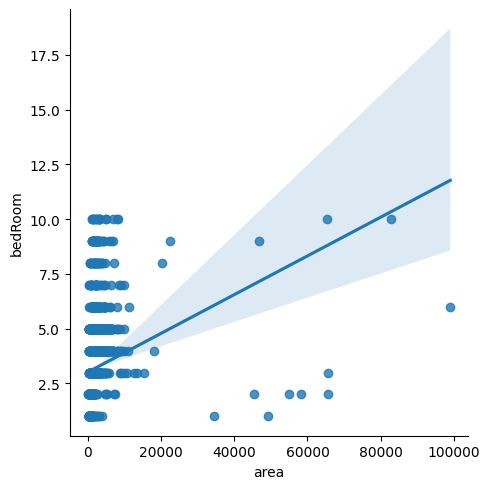

In [85]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [86]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [87]:
(df[df['area_room_ratio']<250])['bedRoom'].value_counts()

bedRoom
2     47
3     33
5     28
6     17
4     17
9     15
8     12
7      9
10     7
Name: count, dtype: int64

In [88]:
df=df[df['area_room_ratio']>100]

In [89]:
outliers_df=df[(df['area_room_ratio']<250) & (df['bedRoom']>3)]

In [90]:
outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\laksh\AppData\Local\Temp\ipykernel_6916\3359844150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [91]:
df.update(outliers_df)

In [92]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [93]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
61,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,2,0,222.750000
531,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,2,0,113.000000
672,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,2,0,198.000000
1019,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,2,0,166.666667
1737,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,1,0,225.000000
2089,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,2,29,120.600000
2435,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,2,8,200.000000
2524,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,2,0,180.000000
2526,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,2,0,225.000000
3062,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,2,0,120.000000


In [94]:
df=df[~((df['area_room_ratio']<250) & (df['bedRoom']>4))]

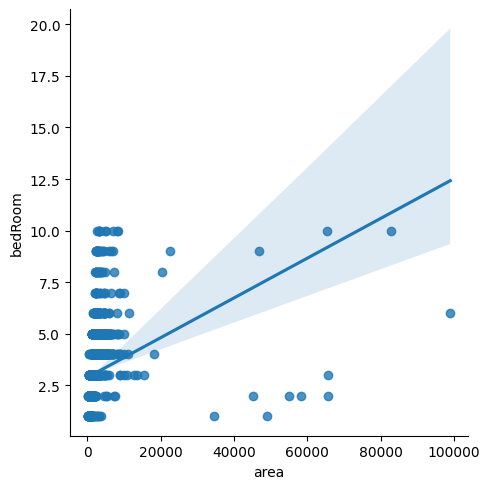

In [95]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [96]:
df.to_csv('Datasets/merged(flats_&_houses)_CLEANED2(Outliers_Treated)',index=False)